# **Ex. 1 - First steps with scikit-learn**

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Splitting data into 70% training and 30% test data:

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Standardizing the features:

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'v', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')


X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# **Ex. 2 - Modeling class probabilities via logistic regression**

### *Part 1 - Train a logistic regression model* (check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with scikit-learn: use C=100.0 and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set.

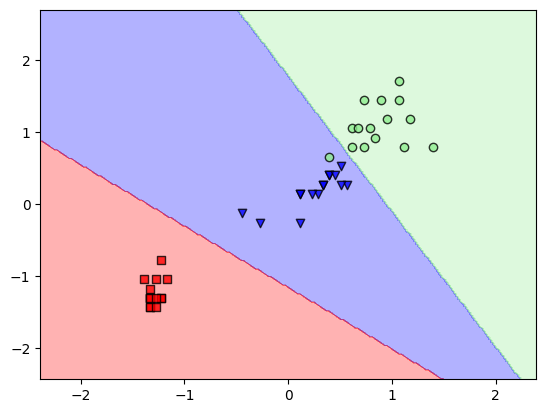

<Figure size 640x480 with 0 Axes>

In [7]:

from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(C=100, random_state=1)
logistic_regression.fit(X_train_std,y_train)
plot_decision_regions(X_test_std,y_test,logistic_regression)
plt.show()
plt.clf()


### *Part 2 - Tackling overfitting via regularization*: evaluate different values for C (up to 100) and observe the accuracy difference between training and test sets. Plot the results.

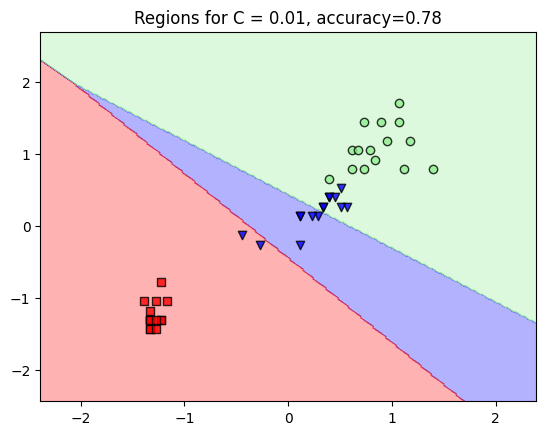

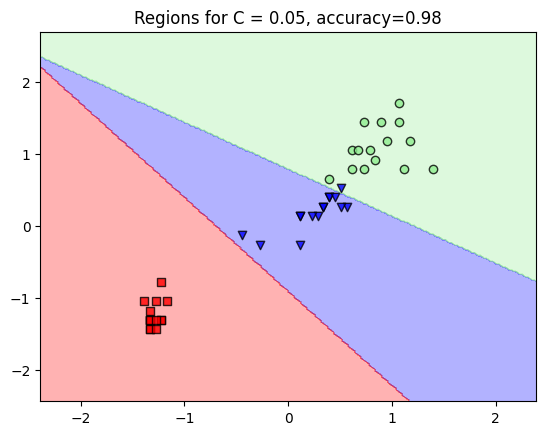

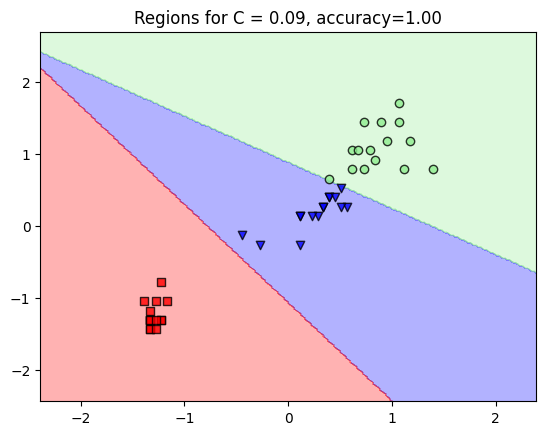

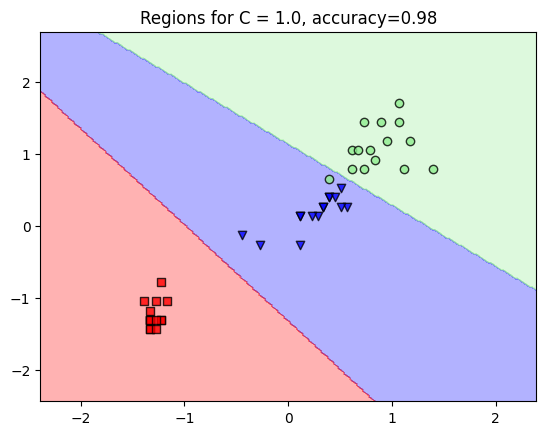

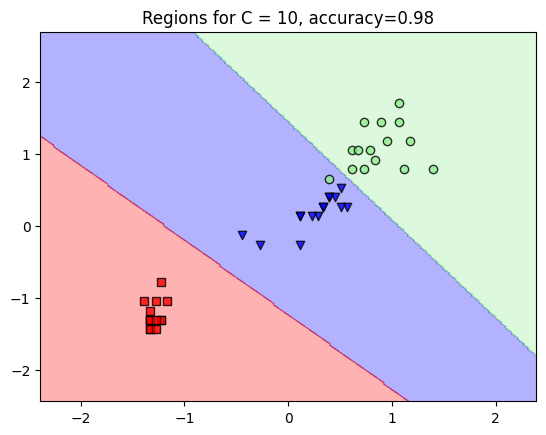

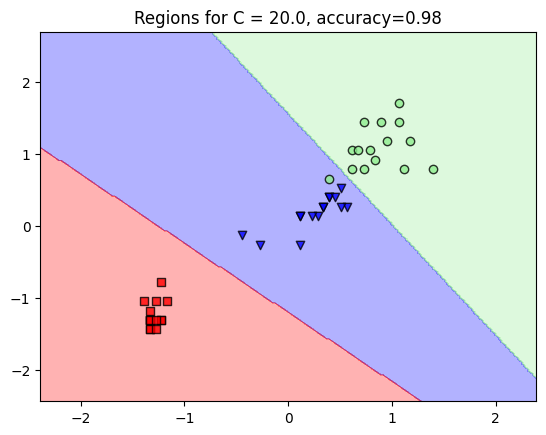

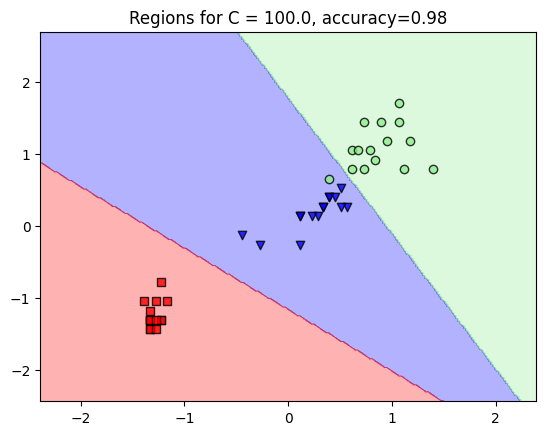

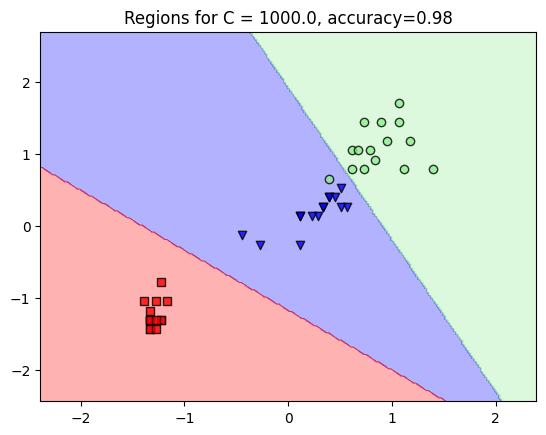

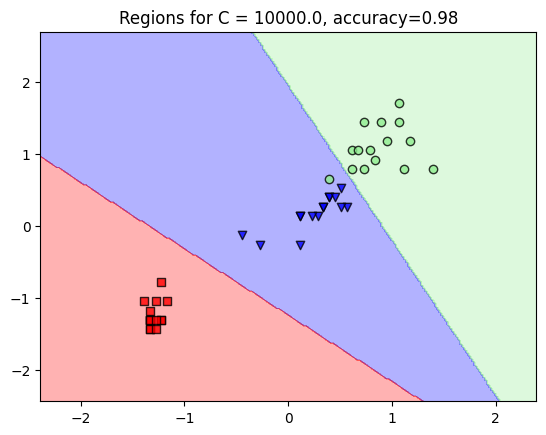

C=0.01, Test Accuracy: 0.78
C=0.05, Test Accuracy: 0.98
C=0.09, Test Accuracy: 1.00
C=1.0, Test Accuracy: 0.98
C=10, Test Accuracy: 0.98
C=20.0, Test Accuracy: 0.98
C=100.0, Test Accuracy: 0.98
C=1000.0, Test Accuracy: 0.98
C=10000.0, Test Accuracy: 0.98


<Figure size 640x480 with 0 Axes>

In [8]:
C_values = [0.01, 0.05,0.09, 1.0, 10, 20.0, 100.0, 1000.0, 10000.0]
accuracies = []

for C_value in C_values:
    logistic_regression = LogisticRegression(C=C_value, random_state=1)
    logistic_regression.fit(X_train_std, y_train)
    plot_decision_regions(X_test_std, y_test, logistic_regression)
    
    y_pred = logistic_regression.predict(X_test_std)
    accuracy = (y_pred == y_test).mean()
    accuracies.append(accuracy)
    plt.title(f"Regions for C = {C_value}, {accuracy=:.2f}")
    plt.show()
    plt.clf()



# Print accuracies
for C_value, accuracy in zip(C_values, accuracies):
    print(f"C={C_value}, Test Accuracy: {accuracy:.2f}")


**Conclusion: According to the test above, we can conclude that when C is lower than 0.01 the accuracy is slightly compromised, for values between 0.06 and 0.09 the accuracy is OPTIMAL, and  has not changed with values from 1 to 100. The overfitting seems to be reduced with higher values of C, keeping the same 98% accuracy**

# **Ex. 3 - Maximum margin classification with support vector machines**

### *Part 1 - Dealing with the nonlinearly separable case using slack variables* (check linear kernel at https://scikit-learn.org/stable/modules/svm.html): use C=1.0 and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend and included above). Evaluate the results on the test set.

d:\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


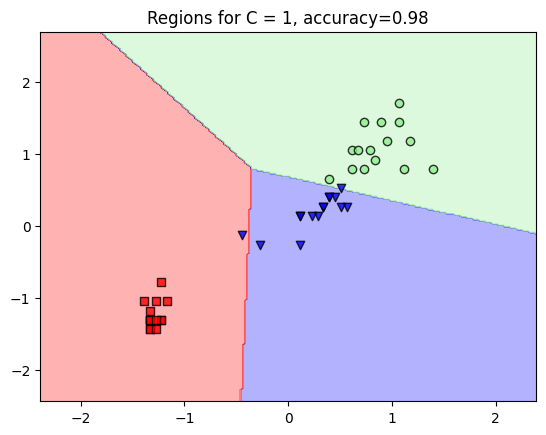

<Figure size 640x480 with 0 Axes>

In [9]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=1, random_state=1)
linear_svc.fit(X_train_std,y_train)
plot_decision_regions(X_test_std,y_test,linear_svc)
y_pred = logistic_regression.predict(X_test_std)
accuracy = (y_pred == y_test).mean()
plt.title(f"Regions for C = {1}, {accuracy=:.2f}")
plt.show()
plt.clf()


### *Part 2 - Using the kernel trick to find separating hyperplanes in higher dimensional space*: use kernel='rbf', C=1.0, gamma=0.2, and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend and included above). Evaluate the results on the test set. Compare and discuss the results with the previous case. Try different values for the kernel parameter and evaluate the results.

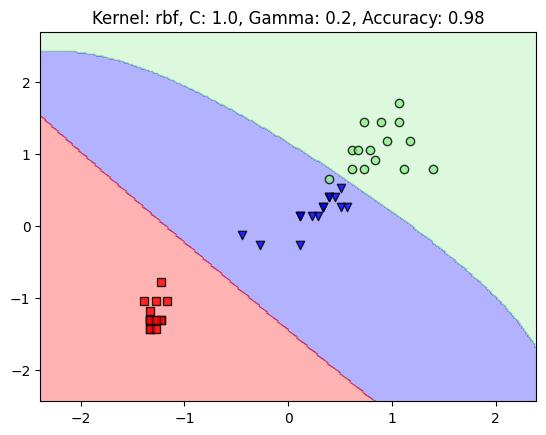

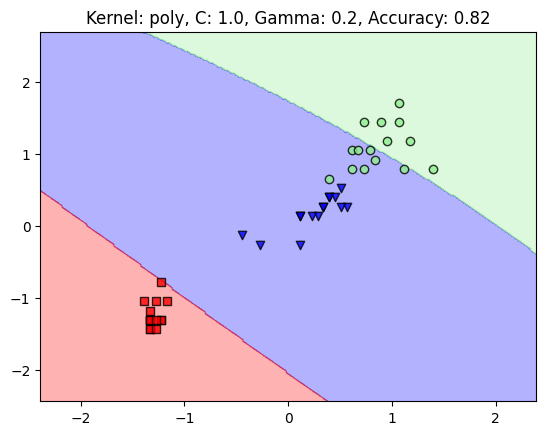

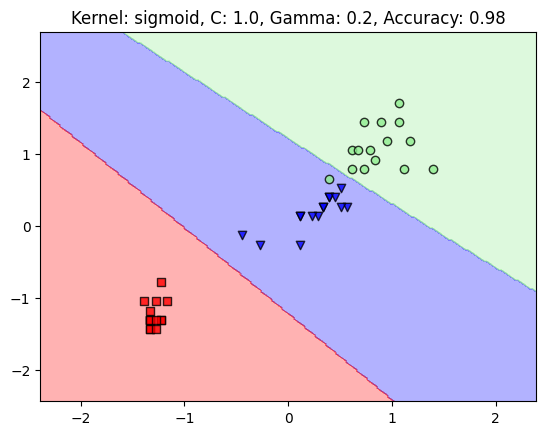

<Figure size 640x480 with 0 Axes>

In [10]:
from sklearn.svm import SVC

kernel_params = [('rbf', 1.0, 0.2), ('poly', 1.0, 0.2), ('sigmoid', 1.0, 0.2)]

for kernel, C_value, gamma_value in kernel_params:
    svm = SVC(kernel=kernel, C=C_value, gamma=gamma_value, random_state=1)
    svm.fit(X_train_std, y_train)
    plot_decision_regions(X_test_std, y_test, svm)
    
    y_pred = svm.predict(X_test_std)
    accuracy = (y_pred == y_test).mean()
    plt.title(f"Kernel: {kernel}, C: {C_value}, Gamma: {gamma_value}, Accuracy: {accuracy:.2f}")
    plt.show()
    plt.clf()


# **Ex. 4 - Decision tree learning**

### *Part 1 - Building a decision tree* (check https://scikit-learn.org/stable/modules/tree.html): use criterion='entropy', max_depth=4, random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set. Try different values for the max_depth and check the result.

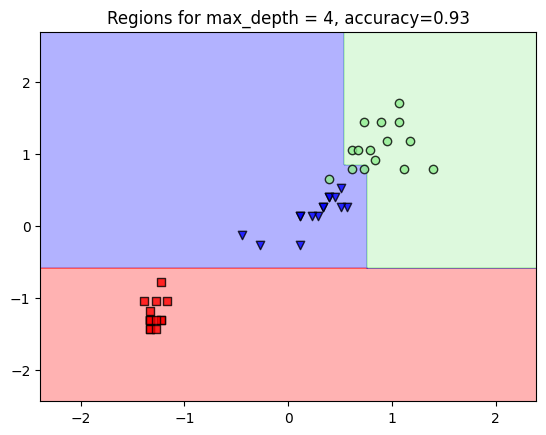

<Figure size 640x480 with 0 Axes>

In [39]:
from sklearn import tree

max_depth = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=1)
decision_tree.fit(X_train_std,y_train)
plot_decision_regions(X_test_std,y_test,decision_tree)
y_pred = decision_tree.predict(X_test_std)
accuracy = (y_pred == y_test).mean()
plt.title(f"Regions for max_depth = {max_depth}, {accuracy=:.2f}")
plt.show()
plt.clf()


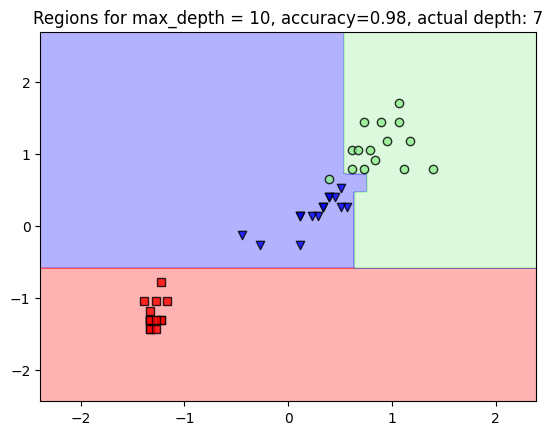

<Figure size 640x480 with 0 Axes>

In [38]:
from sklearn import tree

max_depth = 10
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=1)
decision_tree.fit(X_train_std,y_train)
plot_decision_regions(X_test_std,y_test,decision_tree)
y_pred = decision_tree.predict(X_test_std)
accuracy = (y_pred == y_test).mean()
plt.title(f"Regions for max_depth = {max_depth}, {accuracy=:.2f}, actual depth: {decision_tree.get_depth()}")
plt.show()
plt.clf()


### *Part 2 - Combining weak to strong learners via random forests* (check https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): use criterion='entropy', n_estimators=25, max_depth=4, random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set. Compare with the single tree case. Try different values for the number of trees and check the result.

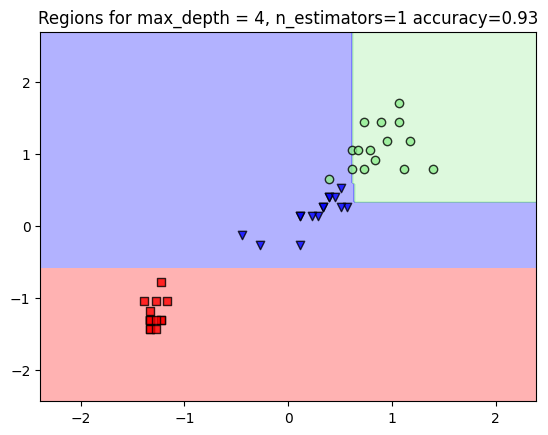

<Figure size 640x480 with 0 Axes>

In [48]:
from sklearn.ensemble import RandomForestClassifier

max_depth = 4
n_estimators = 1
random_forest = RandomForestClassifier(criterion='entropy', n_estimators=n_estimators, max_depth=max_depth, random_state=1)
random_forest.fit(X_train_std,y_train)
plot_decision_regions(X_test_std,y_test,random_forest)
y_pred = random_forest.predict(X_test_std)
accuracy = (y_pred == y_test).mean()
plt.title(f"Regions for max_depth = {max_depth}, {n_estimators=} {accuracy=:.2f}")
plt.show()
plt.clf()
